In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [4]:
##Step1: Load Dataset
df= pd.read_csv("spam.csv")
df.shape

(5572, 2)

In [28]:
df.head(10)

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
df.dtypes

Label        object
EmailText    object
dtype: object

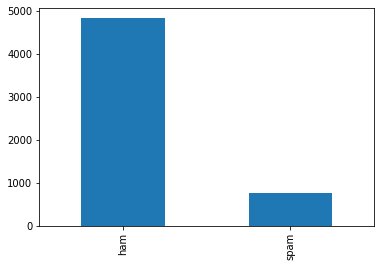

In [9]:
df['Label'].value_counts().plot(kind='bar')

In [34]:
##Step2: Split in to Training and Test Data

x = df["EmailText"]
y = df["Label"]

x_train,y_train = x[0:4457],y[0:4457]
x_test,y_test = x[4457:],y[4457:]

##Step3: Extract Features
cv = CountVectorizer()  
features = cv.fit_transform(x_train)

##Step4: Build a model
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

model = GridSearchCV(svm.SVC(), tuned_parameters)

model.fit(features,y_train)

print(model.best_params_)
#Step5: Test Accuracy
print(model.score(cv.transform(x_test),y_test))

C:\Users\DeLL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9865470852017937


In [35]:
features

<4457x7756 sparse matrix of type '<class 'numpy.int64'>'
	with 59297 stored elements in Compressed Sparse Row format>

In [31]:
t='Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C apply 08452810075over18'
model.predict(cv.transform(pd.Series(t)))

array(['spam'], dtype=object)

In [17]:
type(x_test)

pandas.core.series.Series